In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
dataframe=pd.read_csv('F.csv')

In [120]:
dataframe

,ticker,date,open,high,low,close
0,F,1972-06-01,0.00,2.170,2.15,2.15
1,F,1972-06-02,2.15,2.170,2.14,2.15
2,F,1972-06-05,2.15,2.170,2.14,2.15
3,F,1972-06-06,2.15,2.160,2.12,2.12
4,F,1972-06-07,2.12,2.140,2.11,2.11
...,...,...,...,...,...,...
13272,F,2025-03-07,9.54,9.960,9.51,9.90
13273,F,2025-03-10,9.77,10.135,9.77,9.96
13274,F,2025-03-11,9.69,9.690,9.49,9.69
13275,F,2025-03-12,9.59,9.590,9.46,9.59


In [121]:
#display the number of rows and columns
dataframe.shape

(13277, 6)

In [122]:
#display columns
dataframe.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close'], dtype='object')

In [123]:
#display data types
dataframe.dtypes

,0
ticker,object
date,object
open,float64
high,float64
low,float64
close,float64


In [124]:
dataframe.describe()

,open,high,low,close
count,13277.000000,13277.000000,13277.000000,13277.000000
mean,6.129314,6.209215,6.043668,6.125528
std,4.833220,4.902014,4.763969,4.831786
min,0.000000,0.182895,0.176369,0.176369
25%,1.802880,1.820000,1.790000,1.802880
50%,5.323400,5.401990,5.258050,5.323400
75%,9.574430,9.677320,9.470560,9.581290
max,30.090000,30.430000,29.880000,30.020000


In [125]:
dataframe.isnull().sum()

,0
ticker,0
date,0
open,0
high,0
low,0
close,0


In [126]:
dataframe.drop(
    columns=['ticker'],
    inplace=True
)

In [127]:
dataframe

,date,open,high,low,close
0,1972-06-01,0.00,2.170,2.15,2.15
1,1972-06-02,2.15,2.170,2.14,2.15
2,1972-06-05,2.15,2.170,2.14,2.15
3,1972-06-06,2.15,2.160,2.12,2.12
4,1972-06-07,2.12,2.140,2.11,2.11
...,...,...,...,...,...
13272,2025-03-07,9.54,9.960,9.51,9.90
13273,2025-03-10,9.77,10.135,9.77,9.96
13274,2025-03-11,9.69,9.690,9.49,9.69
13275,2025-03-12,9.59,9.590,9.46,9.59


In [128]:
# Ensure 'date' column is in datetime format
dataframe['date'] = pd.to_datetime(dataframe['date'])

In [129]:
dataframe['year']=dataframe['date'].dt.year
dataframe['month']=dataframe['date'].dt.month
dataframe['day']=dataframe['date'].dt.day


In [130]:
dataframe

,date,open,high,low,close,year,month,day
0,1972-06-01,0.00,2.170,2.15,2.15,1972,6,1
1,1972-06-02,2.15,2.170,2.14,2.15,1972,6,2
2,1972-06-05,2.15,2.170,2.14,2.15,1972,6,5
3,1972-06-06,2.15,2.160,2.12,2.12,1972,6,6
4,1972-06-07,2.12,2.140,2.11,2.11,1972,6,7
...,...,...,...,...,...,...,...,...
13272,2025-03-07,9.54,9.960,9.51,9.90,2025,3,7
13273,2025-03-10,9.77,10.135,9.77,9.96,2025,3,10
13274,2025-03-11,9.69,9.690,9.49,9.69,2025,3,11
13275,2025-03-12,9.59,9.590,9.46,9.59,2025,3,12


In [131]:
dataframe.drop(
    columns=['date'],inplace=True
)

In [132]:
dataframe

,open,high,low,close,year,month,day
0,0.00,2.170,2.15,2.15,1972,6,1
1,2.15,2.170,2.14,2.15,1972,6,2
2,2.15,2.170,2.14,2.15,1972,6,5
3,2.15,2.160,2.12,2.12,1972,6,6
4,2.12,2.140,2.11,2.11,1972,6,7
...,...,...,...,...,...,...,...
13272,9.54,9.960,9.51,9.90,2025,3,7
13273,9.77,10.135,9.77,9.96,2025,3,10
13274,9.69,9.690,9.49,9.69,2025,3,11
13275,9.59,9.590,9.46,9.59,2025,3,12


In [133]:
boxplot_dataframe=dataframe.drop(columns=['day','year','month'],inplace=False)

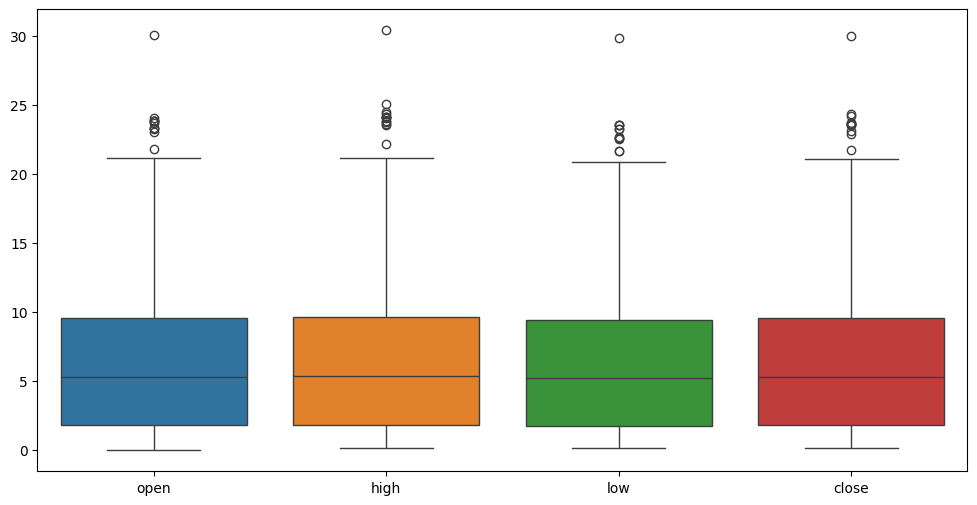

In [134]:
#Creating a box plot to see the number of outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=boxplot_dataframe, ax=ax)
plt.savefig('boxplot.png')
plt.show()

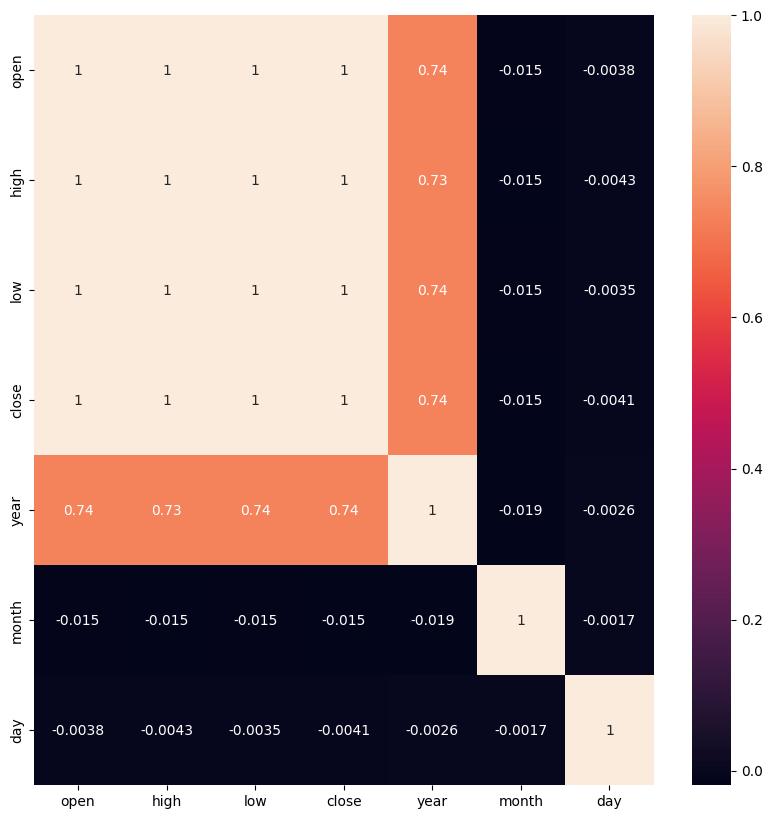

In [135]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(dataframe.corr(),annot=True)
plt.savefig('heatmap.png')
plt.show()

In [136]:
print(dataframe.corr())

           open      high       low     close      year     month       day
open   1.000000  0.999764  0.999742  0.999543  0.735437 -0.015279 -0.003774
high   0.999764  1.000000  0.999679  0.999790  0.734668 -0.015426 -0.004282
low    0.999742  0.999679  1.000000  0.999781  0.735219 -0.014577 -0.003517
close  0.999543  0.999790  0.999781  1.000000  0.735012 -0.015346 -0.004073
year   0.735437  0.734668  0.735219  0.735012  1.000000 -0.019322 -0.002594
month -0.015279 -0.015426 -0.014577 -0.015346 -0.019322  1.000000 -0.001662
day   -0.003774 -0.004282 -0.003517 -0.004073 -0.002594 -0.001662  1.000000


In [137]:
x=dataframe[['year','month','day','open','high','low']]
y=dataframe['close']

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) #In fit_transform(x_train), fit() computes the mean and standard deviation of x_train, transform() then scales x_train using these computed values.
#This above line ensures that x_train is standardized properly.
x_test=scaler.transform(x_test) #transform(x_test) Uses the same mean and standard deviation from x_train to scale x_test.
#Does NOT recompute mean & std from x_test (which prevents data leakage).
#Ensures that x_train and x_test follow the same distribution, making model predictions meaningful.

In [140]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [141]:
y_pred=model.predict(x_test)

In [142]:
y_pred

array([ 0.2178671 , 15.92717627,  9.26486114, ...,  3.29793104,
        4.74138356, 12.80152151])

In [143]:
pd.DataFrame({"Actual_vlaues":y_test,"Predicted_values":y_pred})

,Actual_vlaues,Predicted_values
2343,0.222139,0.217867
12456,15.947600,15.927176
11198,9.321620,9.264861
554,1.320000,1.328428
5438,5.382500,5.362226
...,...,...
9532,8.714190,8.655944
4426,3.102500,3.075270
4195,3.311800,3.297931
5387,4.735680,4.741384


In [146]:
latest_data = dataframe.iloc[-1]
print(latest_data)

open        9.57
high        9.95
low         9.50
close       9.53
year     2025.00
month       3.00
day        13.00
Name: 13276, dtype: float64


In [145]:
import pandas as pd

# Select the latest row for prediction
latest_date = pd.to_datetime(f"{int(latest_data['year'])}-{int(latest_data['month']):02d}-{int(latest_data['day']):02d}")

# Add one day to the latest date
next_day = latest_date + pd.Timedelta(days=1)

# Create a new DataFrame for the next day
next_day_data = pd.DataFrame({
    'year': [next_day.year],
    'month': [next_day.month],
    'day': [next_day.day],
    'open': [latest_data['close']],  # Assuming next day's open is today's close
    'high': [latest_data['close']],  # Assuming next day's high is today's close
    'low': [latest_data['close']]   # Assuming next day's low is today's close
})

# Apply the same scaling used on x_train and x_test
next_day_data_scaled = scaler.transform(next_day_data)

# Now predict
predicted_close = model.predict(next_day_data_scaled)
print(f"Predicted Closing Price for {next_day.strftime('%Y-%m-%d')}: {predicted_close[0]}")

Predicted Closing Price for 2025-03-14: 9.533521330958228


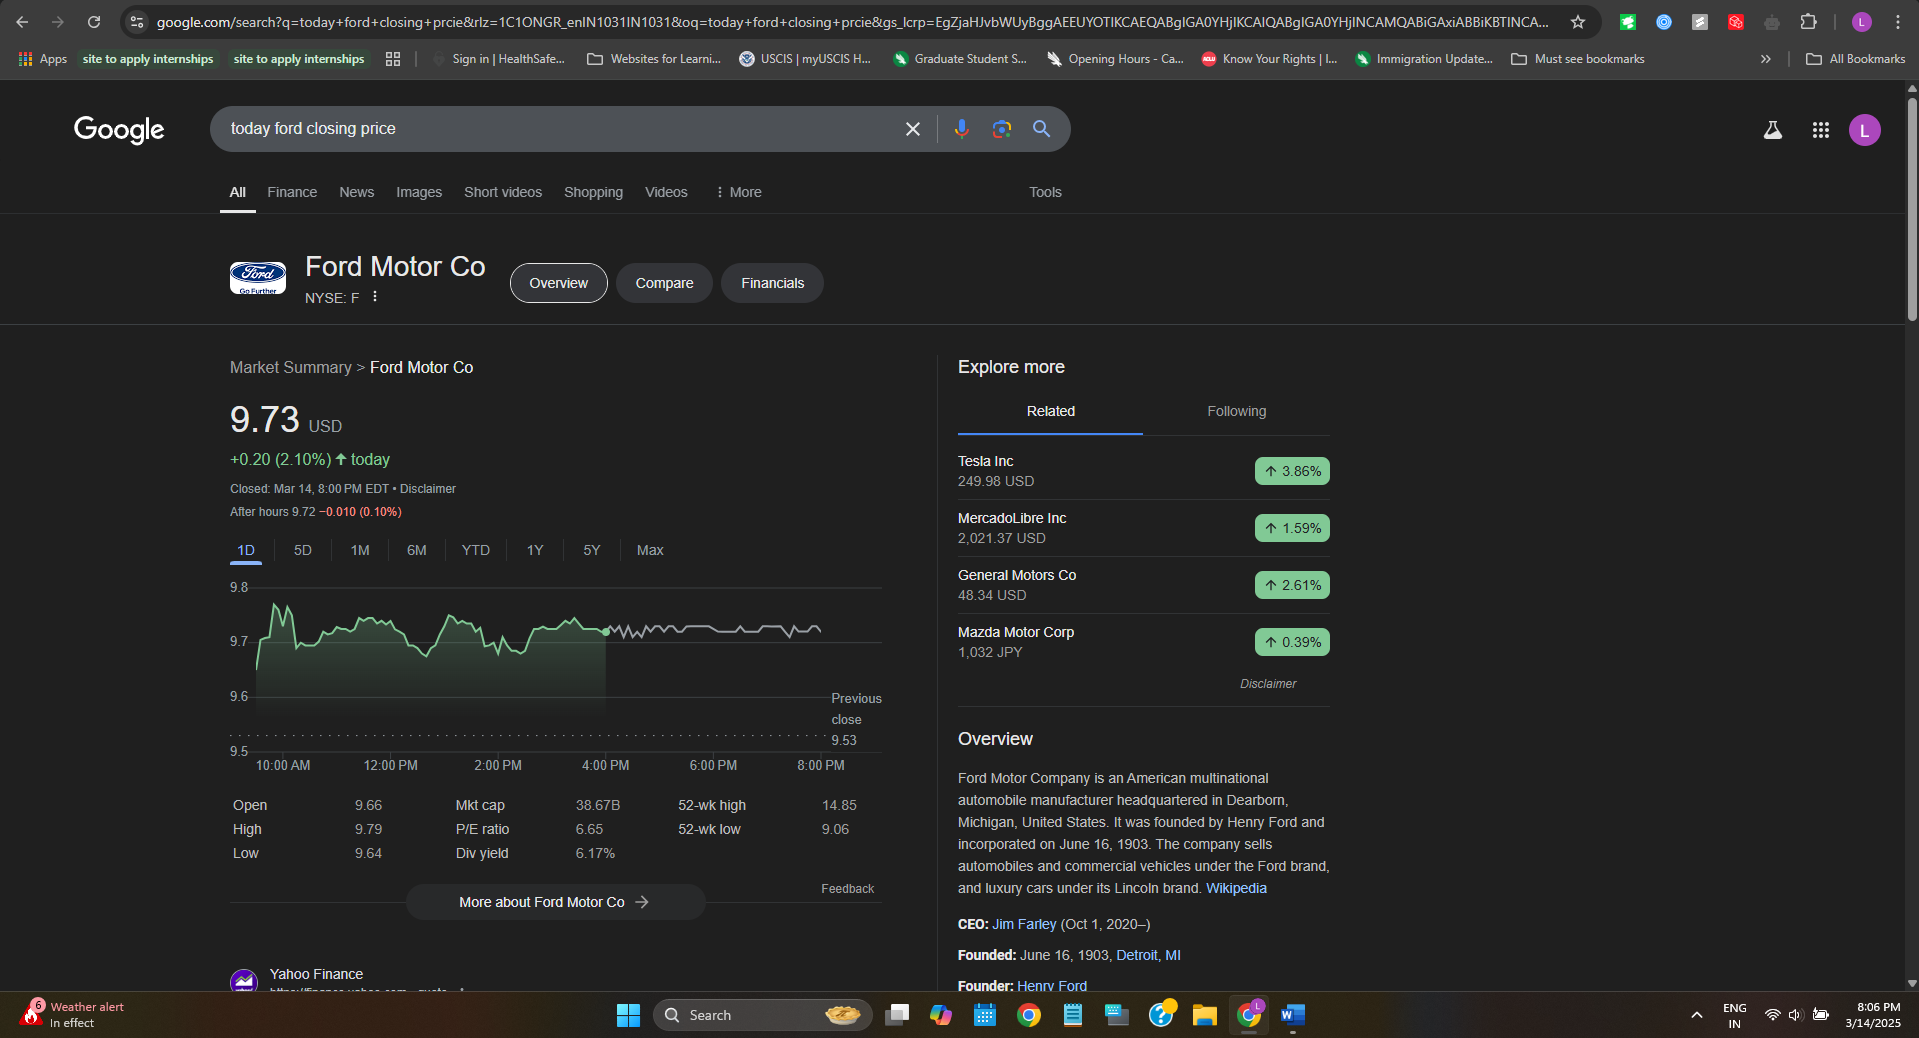

In [148]:
# Actual closing price (for 14th March 2025)
actual_close = 9.73  # end of the day i saw the closing price on 14th march 2025

# Calculate the percentage error
percentage_error = (abs(actual_close - predicted_close) / actual_close) * 100

# Calculate the accuracy
accuracy = 100 - percentage_error

# Print the result
print(f"Accuracy: {accuracy[0]:.2f}%")


Accuracy: 97.98%
